In [2]:
import nltk
import csv, os
import pandas as pd
from scipy.stats import spearmanr
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wn_ic
from nltk.corpus import lin_thesaurus as lin

import gensim
nltk.download("wordnet")
nltk.download("wordnet_ic")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.


True

2 Useful WN Functions


In [6]:
syn = wn.synsets("book")
print(syn)
print()

syn_noun = wn.synsets("book", wn.NOUN)
print(syn_noun)
print()
print(syn_noun[0])

[Synset('book.n.01'), Synset('book.n.02'), Synset('record.n.05'), Synset('script.n.01'), Synset('ledger.n.01'), Synset('book.n.06'), Synset('book.n.07'), Synset('koran.n.01'), Synset('bible.n.01'), Synset('book.n.10'), Synset('book.n.11'), Synset('book.v.01'), Synset('reserve.v.04'), Synset('book.v.03'), Synset('book.v.04')]

[Synset('book.n.01'), Synset('book.n.02'), Synset('record.n.05'), Synset('script.n.01'), Synset('ledger.n.01'), Synset('book.n.06'), Synset('book.n.07'), Synset('koran.n.01'), Synset('bible.n.01'), Synset('book.n.10'), Synset('book.n.11')]

Synset('book.n.01')


In [7]:
syn_a = syn_noun[0]
print("definition:\n", syn_a.definition())
print()
print("hyponyms:\n", syn_a.hyponyms())
print()
print("hyponyms:\n", syn_a.hypernyms())


definition:
 a written work or composition that has been published (printed on pages bound together)

hyponyms:
 [Synset('appointment_book.n.01'), Synset('authority.n.07'), Synset('bestiary.n.01'), Synset('booklet.n.01'), Synset('catalog.n.01'), Synset('catechism.n.02'), Synset('copybook.n.01'), Synset('curiosa.n.01'), Synset('formulary.n.01'), Synset('phrase_book.n.01'), Synset('playbook.n.02'), Synset('pop-up_book.n.01'), Synset('prayer_book.n.01'), Synset('reference_book.n.01'), Synset('review_copy.n.01'), Synset('songbook.n.01'), Synset('storybook.n.01'), Synset('textbook.n.01'), Synset('tome.n.01'), Synset('trade_book.n.01'), Synset('workbook.n.01'), Synset('yearbook.n.01')]

hyponyms:
 [Synset('publication.n.01')]


In [8]:
syn_b = syn_noun[1]
print("Path similarity: ", syn_a.path_similarity(syn_b))

brown_ic = wn_ic.ic("ic-brown.dat")
print("Resnik similarity: ", syn_a.res_similarity(syn_b, brown_ic))
print("Lin similarity: ", syn_a.lin_similarity(syn_b, brown_ic))

Path similarity:  0.2
Resnik similarity:  5.454686565783099
Lin similarity:  0.7098990245459575


2.1 Tasks
1. Write a function to return the path similarity of two nouns. Remember this is the maximum
similarity of all of the possible pairings of the two nouns. Make sure you test it. For (chicken,car)
the correct answer is 0.0909 (3sf).

In [9]:
def calculate_similarity(word1, word2):
    syn_word1 = wn.synsets(word1, wn.NOUN)
    syn_word2 = wn.synsets(word2, wn.NOUN)
    similarities = []

    for syn1 in syn_word1:
        for syn2 in syn_word2:
            similarities.append(syn1.path_similarity(syn2))

    similarities.sort()
    return similarities[-1]

max_similarity = calculate_similarity("chicken", "car")
print(max_similarity)

0.09090909090909091


2. Generalise it so that you have an extra (optional) parameter which you use to select the WordNet
similarity measure e.g., res similarity and lin similarity


In [10]:
def calculate_similarity_type(word1, word2, category):
    syn_word1 = wn.synsets(word1, wn.NOUN)
    syn_word2 = wn.synsets(word2, wn.NOUN)

    similarities = []
    if category == "path":
        for syn1 in syn_word1:
            for syn2 in syn_word2:
                similarities.append(syn1.path_similarity(syn2, brown_ic))
    elif category == "res":
        for syn1 in syn_word1:
            for syn2 in syn_word2:
                similarities.append(syn1.res_similarity(syn2, brown_ic))
    elif category == "lin":
        for syn1 in syn_word1:
            for syn2 in syn_word2:
                similarities.append(syn1.lin_similarity(syn2, brown_ic))
    else:
        return None

    similarities.sort()
    return similarities[-1]

3 Human Synonymy Judgements
mcdata.csv contains the Miller & Charles human similarity judgements discussed in the seminar.
3.1 Tasks
1. Read in mcdata.csv and store it in an appropriate format so that you can obtain a list of pairs of
nouns and the score associated with each pair.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

#path = '/content/drive/My Drive/AdvNLP'
path = '/content/drive/My Drive/Colab Notebooks/'
filename = os.path.join(path, "mcdata.csv")
with open(filename) as instream:
    mcdata = list(csv.reader(instream,dialect = "excel"))

df = pd.DataFrame(mcdata,columns = ["word1", "word2", "human similarity"])
df

Mounted at /content/drive


,word1,word2,human similarity
0,asylum,madhouse,3.61
1,bird,cock,3.05
2,bird,crane,2.97
3,boy,lad,3.76
4,brother,monk,2.82
5,car,automobile,3.92
6,cemetery,woodland,0.95
7,chord,smile,0.13
8,coast,forest,0.42
9,coast,hill,0.87


In [14]:
data = {}
for index, row in df.iterrows():
   data[(row[0], row[1])] = row[2]


2. Calculate the similarity score for each pair of nouns using at least 2 semantic similarity measures.

In [51]:
measures = ["path", "res", "lin"]

for measure in measures:
    scores = []
    for i, triple in enumerate(mcdata):
        scores.append(calculate_similarity_type(triple[0], triple[1], measure))
    df[measure] = scores

df

,word1,word2,human similarity,path,res,lin,word2vec
0,asylum,madhouse,3.61,0.500000,9.475167,0.855584,0.252539
1,bird,cock,3.05,0.500000,7.677755,0.773937,0.362902
2,bird,crane,2.97,0.250000,7.677755,0.747812,0.302862
3,boy,lad,3.76,0.500000,8.399492,0.830562,0.588616
4,brother,monk,2.82,0.500000,9.261593,0.986407,0.223200
5,car,automobile,3.92,1.000000,7.591401,1.000000,0.583837
6,cemetery,woodland,0.95,0.111111,1.290026,0.123441,0.381925
7,chord,smile,0.13,0.090909,2.619644,0.246256,0.148692
8,coast,forest,0.42,0.166667,1.290026,0.130646,0.236098
9,coast,hill,0.87,0.200000,5.884681,0.599113,0.161158


3. Correlate each of the calculated sets of scores with each other and with the human judgements (I
suggest you use scipy.stats.spearmanr() or pandas for this).

In [17]:
correlation_set1_set2, p_value = spearmanr(df["path"], df["human similarity"])
print(f"Spearman correlation between res similarities and lin similarities: {correlation_set1_set2}")

correlation_set1_human, p_value = spearmanr(df["res"], df["human similarity"])
print(f"Spearman correlation between res similarities and data: {correlation_set1_human}")

correlation_set2_human, p_value = spearmanr(df["lin"], df["human similarity"])
print(f"Spearman correlation between lin similarities and human data: {correlation_set2_human}")


Spearman correlation between res similarities and lin similarities: 0.7227433991636342
Spearman correlation between res similarities and data: 0.7359452588385685
Spearman correlation between lin similarities and human data: 0.7535104398162413


In summary, these results indicate that the similarity measurement methods (res and lin) have some level of association with human subjective judgments. However, it's important to recognize that they are not perfectly aligned.

4 Distributional Similarity
4.1 Tasks
1. Repeat the tasks in Section 3 using similarity scores from the word2vec model. Make sure you
correlate the word2vec similarities with the human synonymy judgements and the wordnet similarity
scores.


In [23]:
from gensim.models import KeyedVectors

filename = os.path.join(path, "GoogleNews-vectors-negative300.bin")
mymodel = KeyedVectors.load_word2vec_format(filename, binary=True)


In [24]:
# find most similar words
print(mymodel.most_similar(positive = "man"))

[('woman', 0.7664012908935547), ('boy', 0.6824871301651001), ('teenager', 0.6586930155754089), ('teenage_girl', 0.6147903203964233), ('girl', 0.5921714305877686), ('suspected_purse_snatcher', 0.571636438369751), ('robber', 0.5585119128227234), ('Robbery_suspect', 0.5584409832954407), ('teen_ager', 0.5549196600914001), ('men', 0.5489763021469116)]


In [45]:
word2vec_scores = []

for i, triple in enumerate(mcdata):
    word2vec_scores.append(mymodel.similarity(triple[0], triple[1]))
df["word2vec"] = word2vec_scores

df

,word1,word2,human similarity,path,res,lin,word2vec
0,asylum,madhouse,3.61,0.500000,9.475167,0.855584,0.252539
1,bird,cock,3.05,0.500000,7.677755,0.773937,0.362902
2,bird,crane,2.97,0.250000,7.677755,0.747812,0.302862
3,boy,lad,3.76,0.500000,8.399492,0.830562,0.588616
4,brother,monk,2.82,0.500000,9.261593,0.986407,0.223200
5,car,automobile,3.92,1.000000,7.591401,1.000000,0.583837
6,cemetery,woodland,0.95,0.111111,1.290026,0.123441,0.381925
7,chord,smile,0.13,0.090909,2.619644,0.246256,0.148692
8,coast,forest,0.42,0.166667,1.290026,0.130646,0.236098
9,coast,hill,0.87,0.200000,5.884681,0.599113,0.161158


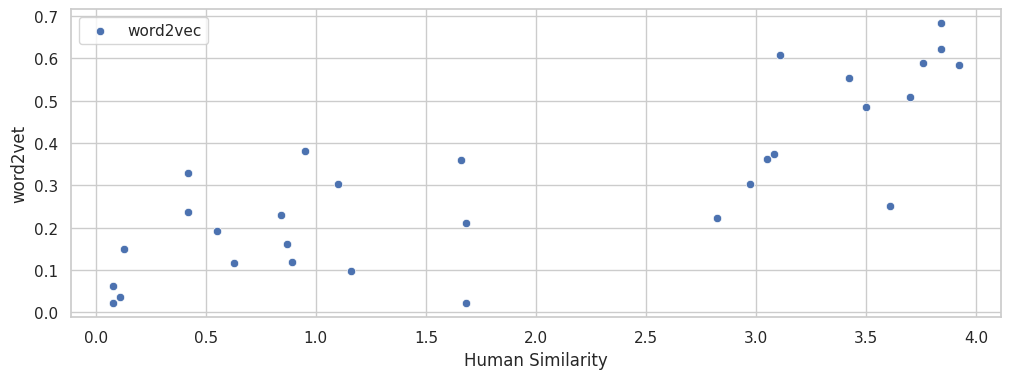

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by="human similarity")

plt.figure(figsize=(12, 4))

sns.scatterplot(x="human similarity", y="word2vec", data=df_sorted, label="word2vec")

plt.legend()

plt.xlabel("Human Similarity")
plt.ylabel("word2vet")

plt.show()
